<a href="https://colab.research.google.com/github/kovacsanna77/IntroToML/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=689e83f553cc10e434aa7e4d572ffae90c56f46f341da3f1bdb9e648c801cce7
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import warnings
import nltk
import base64
import io
import re
import codecs
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
#streamlithez comment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#credits read
df_credits = pd.read_csv("/content/drive/MyDrive/tmdb_5000_credits.csv")

# df_credits = pd.read_csv("tmdb_5000_credits.csv")
#movies read
df_movies = pd.read_csv("/content/drive/MyDrive/tmdb_5000_movies.csv")

# df_movies = pd.read_csv("tmdb_5000_movies.csv")

df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
df_movies = df_movies.drop(['homepage', 'tagline', 'status','production_companies','production_countries'], axis=1)
df_movies = df_movies.dropna(subset=['genres'])  # Drop rows with missing genre information
df_movies = df_movies.dropna(subset=['overview'])
df_movies = df_movies.dropna(subset=['runtime'])

df_movies['genres'] = df_movies['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])
df_movies['keywords']= df_movies['keywords'].apply(lambda x: [genre['name'] for genre in eval(x)])
df_movies['spoken_languages']= df_movies['spoken_languages'].apply(lambda x: [genre['name'] for genre in eval(x)])

df_movies["profit"] =df_movies["revenue"] - df_movies["budget"]
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_month'] = df_movies['release_date'].dt.month_name()
del df_movies["release_date"]

In [ ]:
import ast
#function to get the top 3 actors
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

#function to fetch the director of movie from the crew column
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [ ]:
df_credits['cast'] = df_credits['cast'].apply(convert3)
df_credits['crew'] = df_credits['crew'].apply(fetch_director)
df_credits = df_credits.drop('title',axis=1)
df_credits.columns = ['id','cast','crew']
movies = df_movies.merge(df_credits, on='id')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4800 non-null   int64  
 1   genres             4800 non-null   object 
 2   id                 4800 non-null   int64  
 3   keywords           4800 non-null   object 
 4   original_language  4800 non-null   object 
 5   original_title     4800 non-null   object 
 6   overview           4800 non-null   object 
 7   popularity         4800 non-null   float64
 8   revenue            4800 non-null   int64  
 9   runtime            4800 non-null   float64
 10  spoken_languages   4800 non-null   object 
 11  title              4800 non-null   object 
 12  vote_average       4800 non-null   float64
 13  vote_count         4800 non-null   int64  
 14  profit             4800 non-null   int64  
 15  release_year       4799 non-null   float64
 16  release_month      4799 

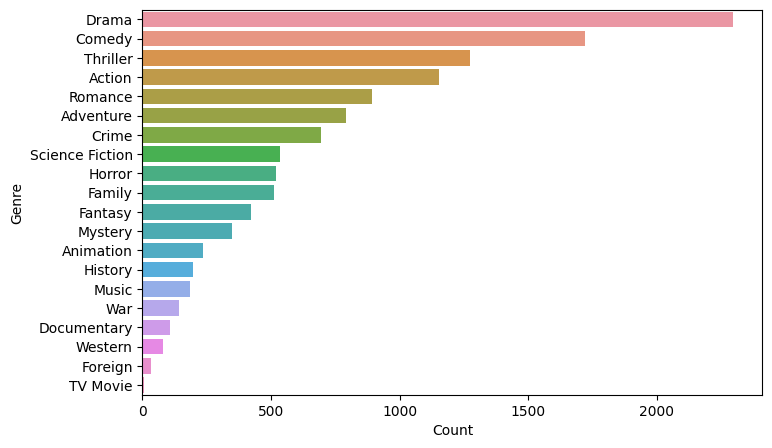

In [ ]:
all_genres = []
for i in movies['genres']:
  for x in i:
    all_genres.append(x)

all_genres = nltk.FreqDist(all_genres)
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})

g = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(8,5))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Genre')
plt.show()


<ipython-input-257-c88ba606248c>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', top_movie_num)


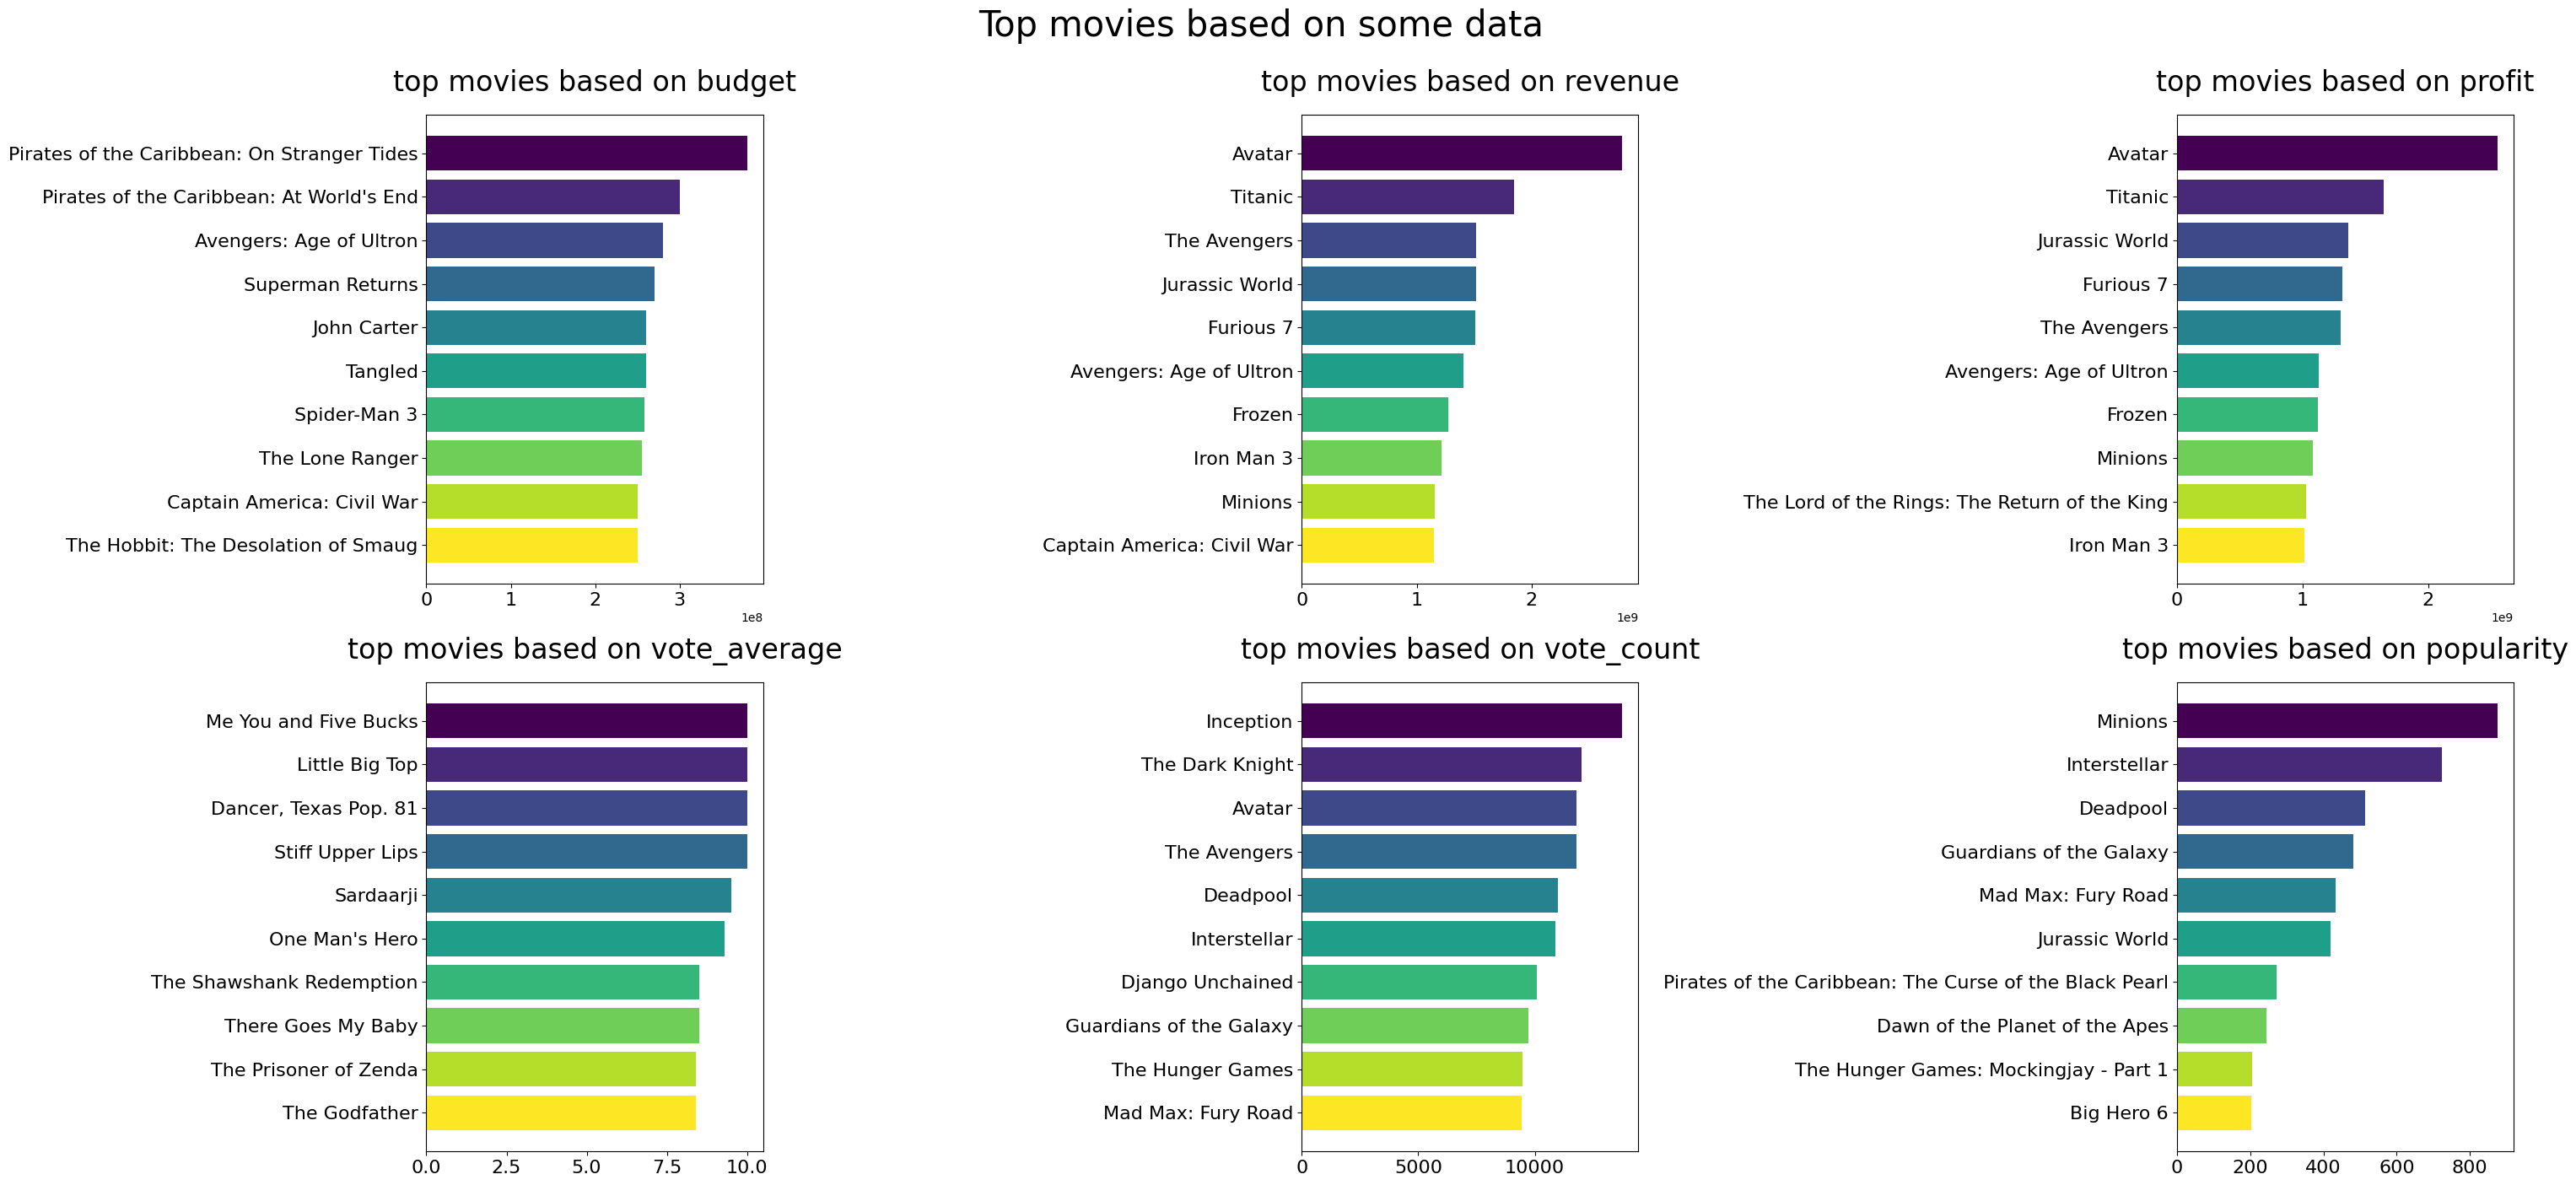

In [ ]:
top_movie_num = 10
top_movies_based_on = ["budget", "revenue","profit", "vote_average", "vote_count", "popularity"]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = movies.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    ax[r][c].barh(top_movies_by["title"], top_movies_by[col], color=colors.colors)
    ax[r][c].set_title(f"top movies based on {col}", fontsize=24, pad=20)
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)
    ax[r][c].invert_yaxis()

plt.suptitle('Top movies based on some data',fontsize=30, y=1)
fig.tight_layout()

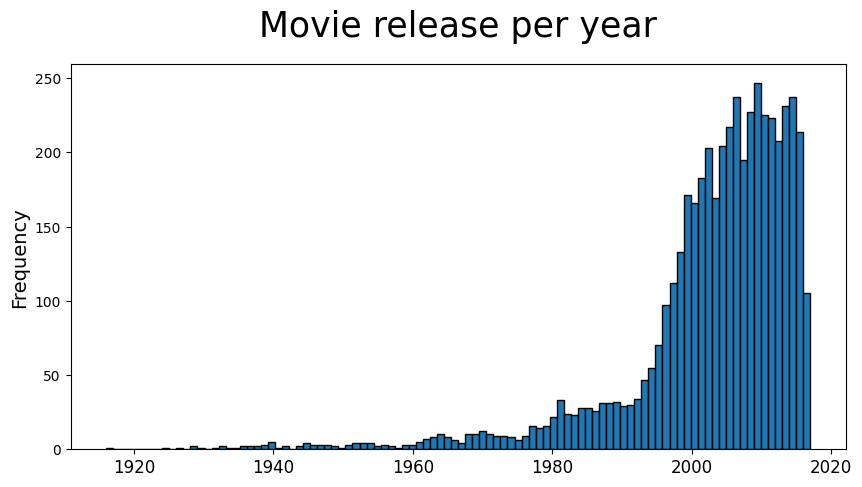

In [ ]:
plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Movie release per year", fontsize=25, pad=20)
movies["release_year"].plot.hist(figsize=(10,5), bins=100, ec="black");

In [ ]:
# applying a transformation to remove spaces between words
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])


In [ ]:
movies['tags'] = movies['overview'] + movies['keywords'] + movies['cast'] + movies['crew']
data = movies[['id','genres','tags']]
data['tags'] = data['tags'].apply(lambda x:" ".join(x))
data['tags'] = data['tags'].apply(lambda x:x.lower())


<ipython-input-10-1b3c43ec7b93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(lambda x:" ".join(x))
<ipython-input-10-1b3c43ec7b93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(lambda x:x.lower())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4800 non-null   int64 
 1   genres  4800 non-null   object
 2   tags    4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.0+ KB


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # removing the commoner morphological and inflexional endings from words in English
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of grouping together different inflected forms of the same word.
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
#Load up our stop words
stop_words = stopwords.words('english')
#Adds stuff to our stop words list
stop_words.extend(['.',','])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def tokenizer(text):
    """
    Tokenizes the document
    """
    return word_tokenize(text)

def remove_stopwords(list_of_tokens):
    """
    Removes stopwords
    """

    cleaned_tokens = []

    for token in list_of_tokens:
        if token in stop_words: continue
        cleaned_tokens.append(token)

    return cleaned_tokens

def stemmer(list_of_tokens):
    '''
    Takes in an input which is a list of tokens, and spits out a list of stemmed tokens.
    '''

    stemmed_tokens_list = []

    for i in list_of_tokens:

        token = PorterStemmer().stem(i)
        stemmed_tokens_list.append(token)

    return stemmed_tokens_list


def lemmatizer(list_of_tokens):

    lemmatized_tokens_list = []

    for i in list_of_tokens:
        token = WordNetLemmatizer().lemmatize(i)
        lemmatized_tokens_list.append(token)

    return lemmatized_tokens_list


def the_untokenizer(token_list):
        '''
        Returns all the tokenized words in the list to one string.
        Used after the pre processing, such as removing stopwords, and lemmatizing.
        '''
        return " ".join(token_list)
def cleaning_our_texts(text):

    cleaned_texts = []
    num_texts = len(text)

    for i in text.index:
        that_string = text[i]
        tokenized_list = tokenizer(that_string)
        removed_stopwords = remove_stopwords(tokenized_list)
        stemmed_words = stemmer(removed_stopwords)
        lemmatized_words = lemmatizer(stemmed_words)
        back_to_string = the_untokenizer(lemmatized_words)

        cleaned_texts.append(back_to_string)

    return cleaned_texts

In [ ]:
mlb = MultiLabelBinarizer()
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('genres')),
                          columns=mlb.classes_,
                          index=data.index))

In [ ]:
data.head()

,id,tags,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
0,19995,"in the 22nd century, a paraplegic marine is di...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,285,"captain barbossa, long believed to be dead, ha...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,a cryptic message from bond’s past sends him o...,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,following the death of district attorney harve...,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,49529,"john carter is a war-weary, former military ca...",1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data = data.drop(['TVMovie', 'Foreign'],axis=1)

In [ ]:
cols = list(data.columns.values)
genre_cols = cols[2::]
print(len(genre_cols), genre_cols)
feature_cols = cols[:2]
print(len(feature_cols), feature_cols)

cols = feature_cols + genre_cols
data.columns = cols

18 ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'Thriller', 'War', 'Western']
2 ['id', 'tags']


In [ ]:
X = data.drop(genre_cols,axis=1)
y = data[genre_cols]

In [ ]:
X['tags'] = cleaning_our_texts(X['tags'])


,id,tags,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,ScienceFiction,Thriller,War,Western
0,19995,"in the 22nd century, a paraplegic marine is di...",1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,285,"captain barbossa, long believed to be dead, ha...",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,206647,a cryptic message from bond’s past sends him o...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,49026,following the death of district attorney harve...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,49529,"john carter is a war-weary, former military ca...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer weights the word counts by a measure of how often they appear in the documents
import joblib
# Instantiate the Vectorizer
# min_df at 20 - token should appear in at least 20 documents to be counted
tfidf = TfidfVectorizer(min_df=20)
# Fit the vectorizer to the training data
#tfidf.fit(X_train['tags'])
# Transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train['tags'])
X_test_tfidf = tfidf.transform(X_test['tags'])

joblib.dump(tfidf, open('my_best_tfidf.pkl','wb'))

In [ ]:
# Create new dataframe with the index of X_test, columns as the content of X_test_transformed token/feature names
X_test_transformed_df = pd.DataFrame(X_test_tfidf.toarray(), index=X_test.index, columns=tfidf.get_feature_names_out())
X_test_transformed_df_full = X_test.join(X_test_transformed_df, on=X_test_transformed_df.index)
test = X_test_transformed_df_full.drop('tags',axis=1)
test.head()

,id,000,10,11,12,15,1930,1950,1960,1970,...,writer,written,wrong,year,yet,york,young,younger,youth,zombi
596,8427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.162671,0.0,0.000000,0.0,0.0,0.0
3370,15581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3048,9893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.121981,0.000000,0.0,0.000000,0.0,0.0,0.0
2908,18530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.162669,0.0,0.0,0.0
8,767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.149157,0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_tfidf.toarray(), index=X_train.index, columns=tfidf.get_feature_names_out())
# Create final X_train dataframe which has been transformed, and only has numeric columns.
X_train_transformed_df_full = X_train.join(X_train_transformed_df, on=X_train_transformed_df.index)
train = X_train_transformed_df_full.drop('tags', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler
my_standard_scaler = StandardScaler().fit(train)
X_train_s = my_standard_scaler.transform(train)
X_test_s = my_standard_scaler.transform(test)

joblib.dump(my_standard_scaler,open('my_best_scaler.pkl','wb'))

array([[-0.54815992, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802],
       [-0.46734733, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802],
       [-0.53159978, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802],
       ...,
       [ 0.64610206, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802],
       [-0.52265324, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802],
       [-0.52859501, -0.0854876 , -0.07525449, ..., -0.08650457,
        -0.10616404, -0.09604802]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
my_log_model = OneVsRestClassifier(LogisticRegression(random_state=123, solver='lbfgs', max_iter=3000, C=0.01, n_jobs=-1), n_jobs=-1)

scores = cross_val_score(my_log_model, train, y_train, cv = 5)
print(scores)

for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")
print(f"Average Score:{np.mean(scores)}")

[0.00260417 0.01041667 0.00520833 0.00260417 0.00651042]
Fold 1: 0.0026041666666666665
Fold 2: 0.010416666666666666
Fold 3: 0.005208333333333333
Fold 4: 0.0026041666666666665
Fold 5: 0.006510416666666667
Average Score:0.00546875


In [ ]:
my_log_model = OneVsRestClassifier(LogisticRegression(random_state=123, solver='lbfgs', max_iter=3000, C=0.01, n_jobs=-1)).fit(X_train_s, y_train)
# random_state=123, solver='lbfgs', max_iter=3000, C=0.01, n_jobs=-1), n_jobs=-1

In [ ]:
y_train_pred = my_log_model.predict(X_train_s)
y_train_proba = my_log_model.predict_proba(X_train_s)
y_test_pred = my_log_model.predict(X_test_s)
y_test_proba = my_log_model.predict_proba(X_test_s)


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import mean_squared_error
import math

mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse = math.sqrt(mse_test)
rocauc= roc_auc_score(y_test, y_test_proba)

print(f'Training score: {accuracy_score(y_train, y_train_pred):0.2f}')
print(f'    Test score: {accuracy_score(y_test, y_test_pred):0.2f}')

Training score: 0.56
    Test score: 0.13


In [ ]:
print('F1 Score: ', f1_score(y_test,y_test_pred, average="micro"))
print('RMSE: ', rmse)
print('AUC: ', rocauc)

F1 Score:  0.5587828492392808
RMSE:  0.332812092461931
AUC:  0.8546142785210423


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
classes = y_test.columns
y_test_array = pd.get_dummies(y_test, drop_first=False).values

print(multilabel_confusion_matrix(y_test, y_test_pred))

[[[646  69]
  [101 144]]

 [[730  57]
  [107  66]]

 [[904  10]
  [ 37   9]]

 [[521  91]
  [141 207]]

 [[770  35]
  [ 88  67]]

 [[941   0]
  [ 17   2]]

 [[370 149]
  [148 293]]

 [[841  22]
  [ 53  44]]

 [[857  14]
  [ 64  25]]

 [[916   8]
  [ 30   6]]

 [[845  13]
  [ 50  52]]

 [[924   1]
  [ 27   8]]

 [[879  15]
  [ 59   7]]

 [[720  65]
  [105  70]]

 [[824  14]
  [ 65  57]]

 [[588 101]
  [125 146]]

 [[927   2]
  [ 24   7]]

 [[951   0]
  [  7   2]]]


In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear',probability=True)
model = OneVsRestClassifier(svm).fit(X_train_s,y_train)


In [ ]:
y_train_pred2 = model.predict(X_train_s)
y_train_proba2 = model.predict_proba(X_train_s)
y_test_pred2 = model.predict(X_test_s)
y_test_proba2 = model.predict_proba(X_test_s)


In [ ]:
mse_test2 = mean_squared_error(y_test, y_test_pred2)
mse_train2 = mean_squared_error(y_train, y_train_pred2)
rmse2 = math.sqrt(mse_test2)
rocauc2= roc_auc_score(y_test, y_test_proba2)

In [ ]:
print(f'Training score: {accuracy_score(y_train, y_train_pred2):0.5f}')
print(f'    Test score: {accuracy_score(y_test, y_test_pred2):0.5f}')

Training score: 0.95182
    Test score: 0.06146


In [ ]:
print('F1 Score: ', f1_score(y_test,y_test_pred2, average="micro"))
print('RMSE: ', rmse2)
print('AUC: ', rocauc2)

F1 Score:  0.48791035974051505
RMSE:  0.38826835412484345
AUC:  0.7946449567847836


In [ ]:

print(classification_report(y_test, y_test_pred ))
print(classification_report(y_test, y_test_pred2 ))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       245
           1       0.54      0.38      0.45       173
           2       0.47      0.20      0.28        46
           3       0.69      0.59      0.64       348
           4       0.66      0.43      0.52       155
           5       1.00      0.11      0.19        19
           6       0.66      0.66      0.66       441
           7       0.67      0.45      0.54        97
           8       0.64      0.28      0.39        89
           9       0.43      0.17      0.24        36
          10       0.80      0.51      0.62       102
          11       0.89      0.23      0.36        35
          12       0.32      0.11      0.16        66
          13       0.52      0.40      0.45       175
          14       0.80      0.47      0.59       122
          15       0.59      0.54      0.56       271
          16       0.78      0.23      0.35        31
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
y_pred_df = pd.DataFrame(y_test_pred2, columns=genre_cols)

# Test set predictions
for g in genre_cols:
    score = accuracy_score(y_test[g], y_pred_df[g])
    print(f'{score:0.4f}  {g}')

0.7740  Action
0.7750  Adventure
0.9333  Animation
0.6844  Comedy
0.8063  Crime
0.9823  Documentary
0.6656  Drama
0.8656  Family
0.8771  Fantasy
0.9417  History
0.8865  Horror
0.9604  Music
0.8958  Mystery
0.7635  Romance
0.8865  ScienceFiction
0.7135  Thriller
0.9708  War
0.9948  Western


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_test_pred2))
print(rmse)

0.38172973763199614


In [ ]:
# from sklearn.naive_bayes import GaussianNB
# nb_clf = GaussianNB()

# model3 = OneVsRestClassifier(nb_clf).fit(X_train_s,y_train)


In [ ]:
# y_train_pred3 = model3.predict(X_train_s)
# y_train_proba3 = model3.predict_proba(X_train_s)
# y_test_pred3 = model3.predict(X_test_s)
# y_test_proba3 = model3.predict_proba(X_test_s)


In [ ]:
# mse_test3 = mean_squared_error(y_test, y_test_pred3)
# mse_train3 = mean_squared_error(y_train, y_train_pred3)
# rmse3 = math.sqrt(mse_test3)
# rocauc3= roc_auc_score(y_test, y_test_proba3)

In [ ]:
# print(f'Training score: {accuracy_score(y_train, y_train_pred3):0.5f}')
# print(f'    Test score: {accuracy_score(y_test, y_test_pred3):0.5f}')

Training score: 0.04036
    Test score: 0.01458


In [ ]:
# print('F1 Score: ', f1_score(y_test,y_test_pred3, average="micro"))
# print('RMSE: ', rmse3)
# print('ROC AUC: ', rocauc3)

F1 Score:  0.43845953682019256
RMSE:  0.49976846491002064
ROC AUC:  0.6332817265282932


In [ ]:
import pickle
filename  = 'predictwithSVM.sav'
filename2 = 'predictwithLogReg.sav'

In [ ]:
pickle.dump(model, open(filename,'wb'))

In [ ]:
pickle.dump(my_log_model, open(filename2,'wb'))